## Implementing of the Simple Linear Regression with Ordinary Least Squares Method 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
data=make_regression(n_samples=1000,n_features=2)

In [3]:
X=data[0]
y=data[1]

Text(0.5, 1.0, 'X-y Values ')

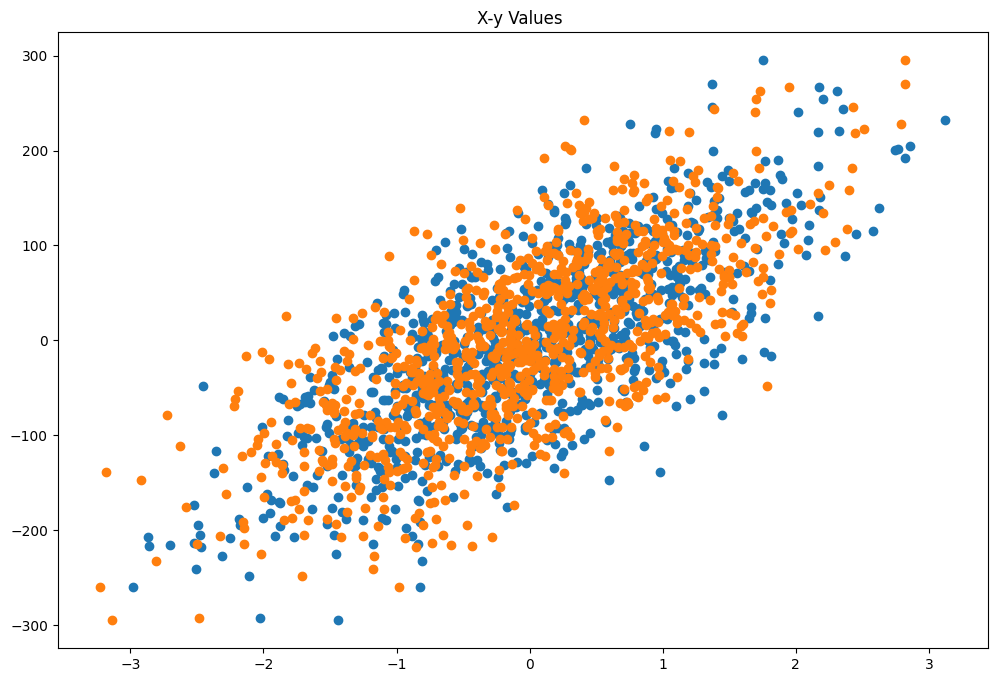

In [4]:
fig=plt.figure(figsize=(12,8))
plt.scatter(X[:,0],y)
plt.scatter(X[:,1],y)
plt.title('X-y Values ')

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [6]:
from PIL import Image

### Ordinary Least Squares Method 

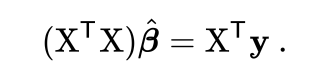

In [7]:
Image.open("Figures/ols.png")

According to the OLS method, both sides of the equation have to multiply with X.transpose(). The reason of the operation is finding weights. In this equation, weights equals to the beta_vector. 
beta_vector refers to beta values of the y=x_1*beta_1 + x_2*beta_2 ... +x_n*beta_n equation

The main difference between simple and multiple linear regression is that mlr takes more dependent values than one. That means, there are 2+ linear fitting in here so we can expect a 2+ coefficient. The fact that the X matrix's first column has to be one,  gives us that there is one intercept value.

* left : left side of the equation which is at the above 
* right : right side the of the equation which is at the above
* weights : intercept and coef in order 

* coeffs / slopes / gradients : second to last elements of the weights
* intercept : first element of the weights

* np.ones added at the ordinary_least_squares() method because wanted to create **vandermonde matrix** to find coef and intercept.
* np.ones added at the predict() methıd because wanted to use np.dot() for **coef * X + intercept relation**

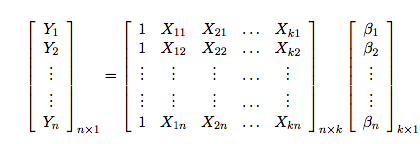

In [8]:
Image.open('Figures/ols_matrix.png')

In [9]:
class LinearRegression_mine():
    
    """
    Ordinary least squares Linear Regression.

    LinearRegression fits a linear model with coefficients w = (w1, …, wp) to 
    minimize the residual sum of squares between the observed targets in the dataset, 
    and the targets predicted by the linear approximation.

    Hyperparameters::
        
        fit_intercept: bool, default=True
        Whether to calculate the intercept for this model. 
        If set to False, no intercept will be used in calculations 
        (i.e. data is expected to be centered).

        positive: bool,default=False
        When set to True, forces the coefficients to be positive. 
        This option is only supported for dense arrays.
        
        weights : array, default=None
        
        To view weights 
        
    Attributes::
    
        coef_ : numpy array
 
        Coefficent of the linear fit.
        
        intercept : int 
        
        Intercept of the linear fit.
     """
    
    
    def __init__(self,fit_intercept=True,positive=False,weights=None):
        
        self.fit_intercept=fit_intercept
        self.positive=positive
        self.weights=weights
        self.coef_=None
        self.intercept_=None
        
    
    def ordinary_least_squares(self,X,y):
        
        X=np.c_[np.ones((X.shape[0],1)),X]  #ones added because wanted to create vandermonde matrix to find coef and intercept.
        left=np.dot(X.transpose(),X)
        right=np.dot(X.transpose(),y)
        weights=np.linalg.solve(left,right)
        
        if self.positive==True:
            
            return abs(weights)
        
        if self.fit_intercept!=True:
            
            weights[0]=0
            weights[1:]=weights[1:]
        
        self.intercept_=weights[0]
        self.coef_=weights[1:]
        
        return weights
    
    
    def fit(self,X,y):
        
        self.weights=self.ordinary_least_squares(X,y)
        
        
    def predict(self,X):
        
        X=np.c_[np.ones((X.shape[0],1)),X]
        yhat=np.dot(X,self.weights).reshape(-1,1)
            
        return yhat
        
               

### Comparing Results with Sklearn.LinearRegression

#### Sklearn Results

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [11]:
model=LinearRegression(fit_intercept=True)

In [12]:
%time model.fit(X_train,y_train)

CPU times: user 1.07 ms, sys: 475 µs, total: 1.54 ms
Wall time: 1.2 ms


LinearRegression()

In [13]:
yhat_sklearn=model.predict(X_test)

In [14]:
r2_score(y_test,yhat_sklearn)

1.0

In [15]:
model.coef_,model.intercept_

(array([65.86720655, 63.71955582]), 2.6645352591003757e-15)

#### Hand-made Results

In [16]:
model=LinearRegression_mine(fit_intercept=True)

In [17]:
%time model.fit(X_train,y_train)

CPU times: user 106 µs, sys: 23 µs, total: 129 µs
Wall time: 115 µs


In [18]:
yhat_mine=model.predict(X_test)

In [19]:
model.coef_,model.intercept_

(array([65.86720655, 63.71955582]), 6.186327178651744e-16)

In [20]:
r2_score(y_test,yhat_mine)

1.0

### Gradient Descent Method

In [21]:
from PIL import Image

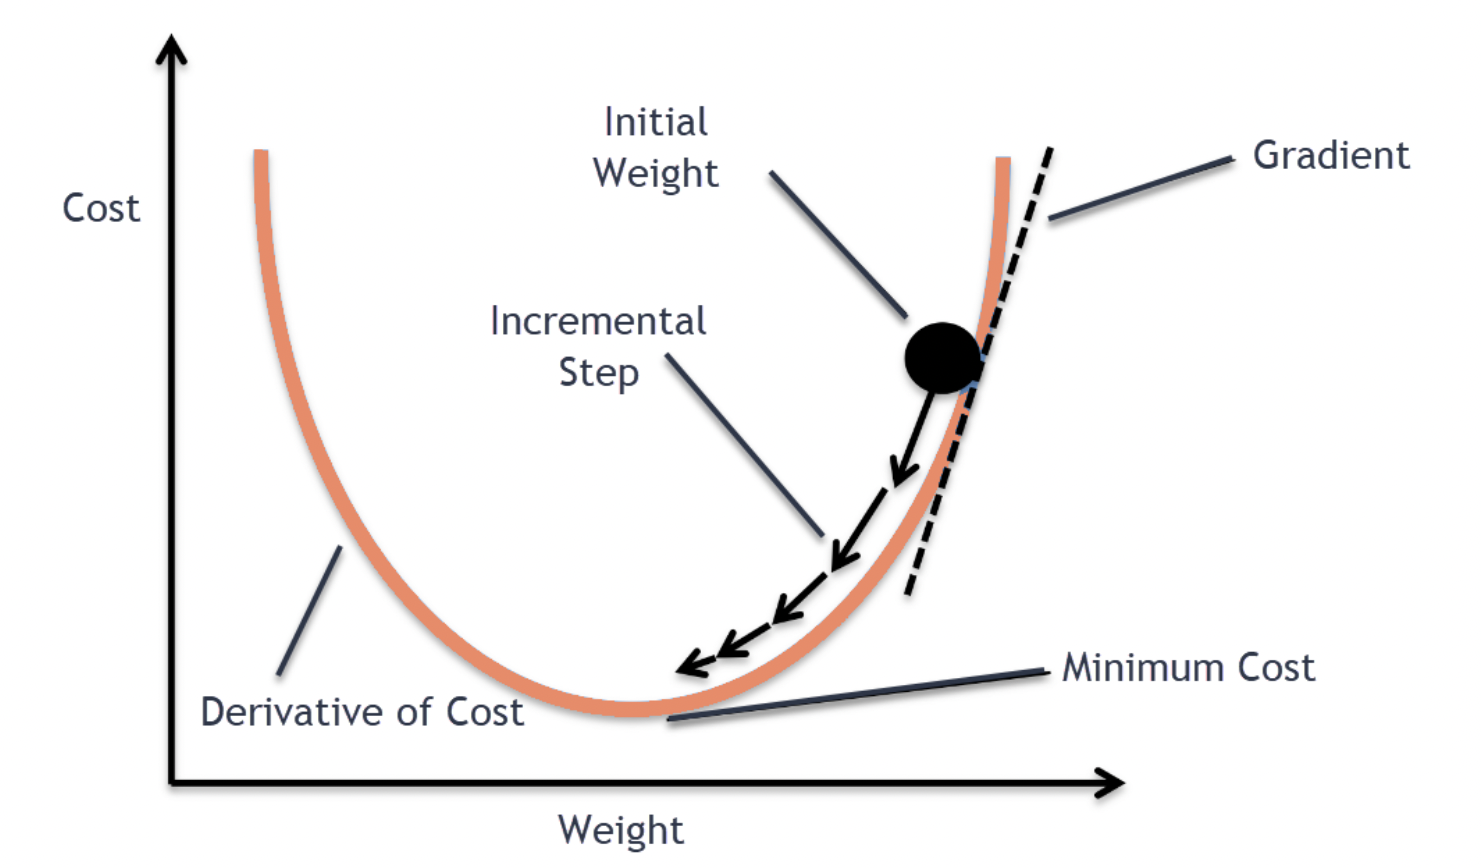

In [22]:
Image.open("Figures/gradientdescent.png")

In [23]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train] #vandermonde matrix
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
lrate=0.15
n = X_train.size 
epochs=1000

In [24]:
weights=np.random.rand(X_train_b.shape[1])
for _ in range(epochs): 
    
    y_pred_train =np.dot(X_train_b,weights).reshape(-1,)
    D_b1_1 = (-2/n) * (X_train[:,0].ravel()* (y_train-y_pred_train)).sum()
    D_b1_2 = (-2/n) * (X_train[:,1].ravel()* (y_train-y_pred_train)).sum()
    
    D_b0 = (-2/n) * (y_train-y_pred_train).sum() 
    weights[1] -= (lrate * D_b1_1)
    weights[0] -= (lrate * D_b0 )
    weights[2] -= (lrate * D_b1_2 )


In [25]:
print('coef_:',weights[1:],'intercept_:',weights[0])

coef_: [65.86720655 63.71955582] intercept_: -2.090355828133576e-15


### Comparing Plots of the Hand-made, Sklearn.LinearRegression and Gradient Descent Methods

Text(0.5, 1.0, ' Hand-made Method')

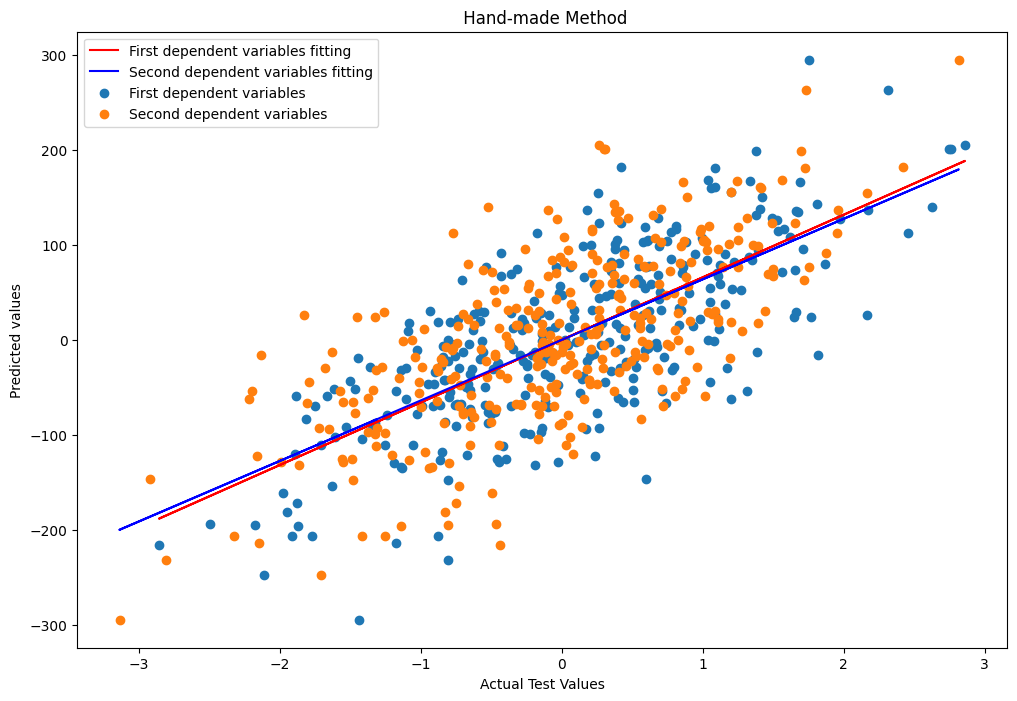

In [26]:
plt.figure(figsize=(12,8))
plt.plot(X_test[:,0],(X_test[:,0]*model.coef_[0]) + model.intercept_,'r',label='First dependent variables fitting')
plt.plot(X_test[:,1],(X_test[:,1]*model.coef_[1]) + model.intercept_,'b',label='Second dependent variables fitting')
plt.scatter(X_test[:,0],y_test,label='First dependent variables') #result of the hand-made functions.
plt.scatter(X_test[:,1],y_test,label='Second dependent variables')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted values')
plt.legend()
plt.title(' Hand-made Method')

Text(0.5, 1.0, 'Sklearn.LinearRegression Method')

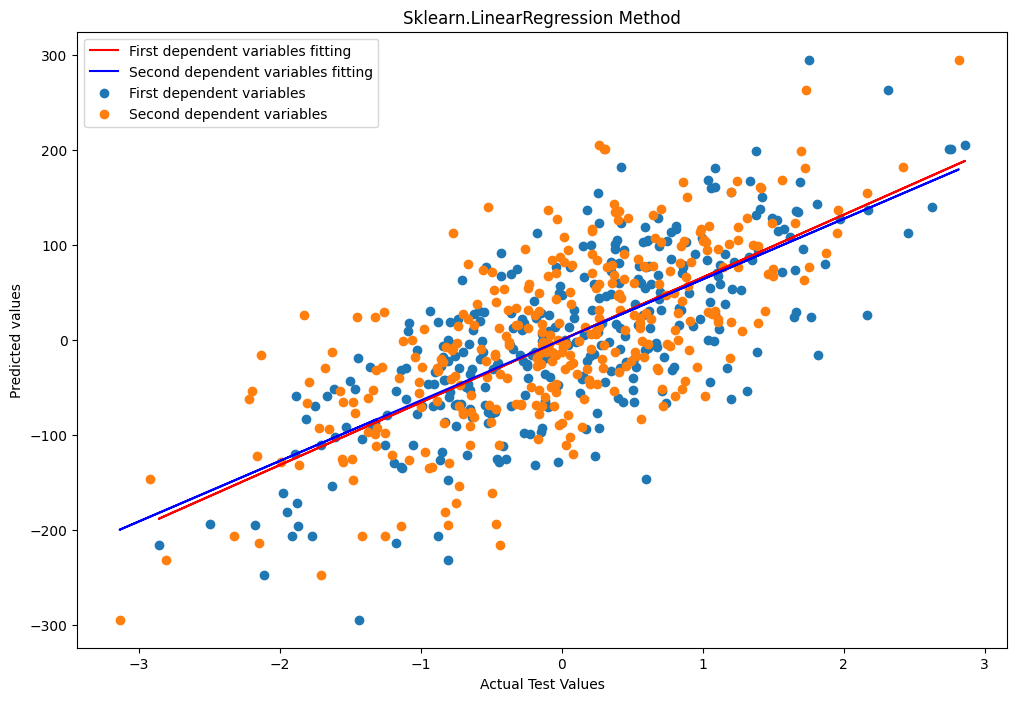

In [27]:
plt.figure(figsize=(12,8))
plt.plot(X_test[:,0],(X_test[:,0]*LinearRegression().fit(X_train,y_train).coef_[0])+LinearRegression().fit(X_train,y_train).intercept_,'r',label='First dependent variables fitting')
plt.plot(X_test[:,1],(X_test[:,1]*LinearRegression().fit(X_train,y_train).coef_[1])+LinearRegression().fit(X_train,y_train).intercept_,'b',label='Second dependent variables fitting')
plt.scatter(X_test[:,0],y_test,label='First dependent variables') 
plt.scatter(X_test[:,1],y_test,label='Second dependent variables')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Sklearn.LinearRegression Method')

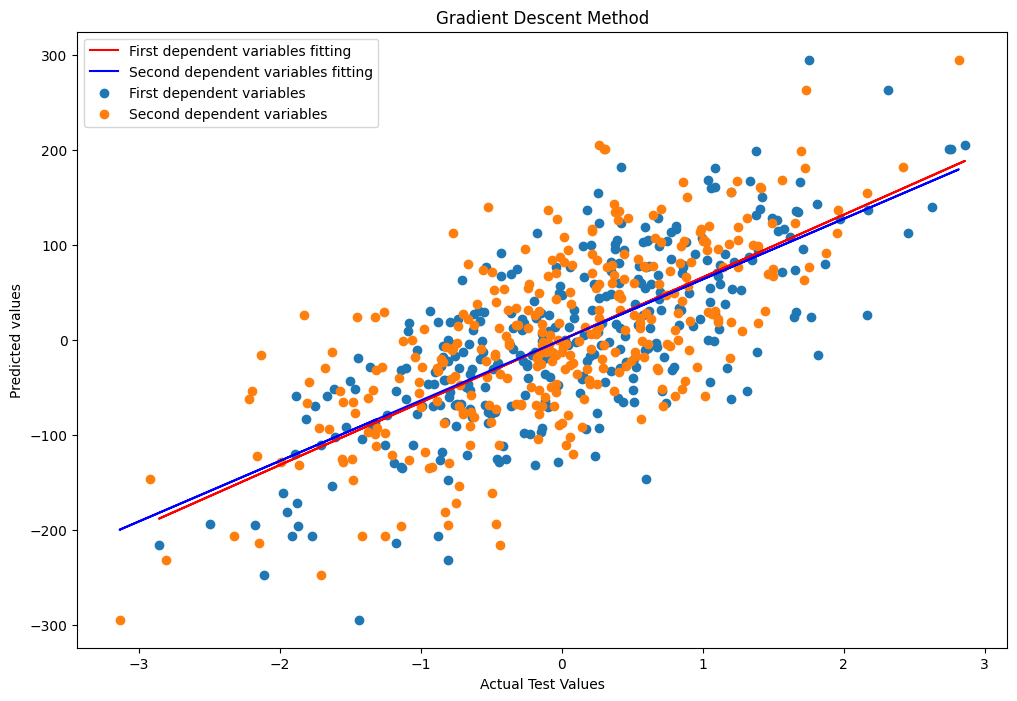

In [28]:
fig=plt.figure(figsize=(12,8))
plt.plot(X_test[:,0],(weights[1]*X_test[:,0])+weights[0],color='r',label='First dependent variables fitting')
plt.plot(X_test[:,1],(weights[2]*X_test[:,1])+weights[0],color='b',label='Second dependent variables fitting')
plt.scatter(X_test[:,0],y_test,label='First dependent variables') 
plt.scatter(X_test[:,1],y_test,label='Second dependent variables')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted values')
plt.title('Gradient Descent Method')
plt.legend()